In [1]:
DATA_FINAL_ROOT = "/mnt/data/UNav-IO/data"
DATA_TEMP_ROOT = "/mnt/data/UNav-IO/temp"
FEATURE_MODEL = "DinoV2Salad"
LOCAL_FEATURE_MODEL = "superpoint+lightglue"

PLACES = ["New_York_City"]
BUILDINGS = ["LightHouse"]
FLOORS = ["3_floor", "4_floor", "6_floor"]

In [2]:
import cv2
import numpy as np
from config import UNavConfig
import matplotlib.pyplot as plt

# Step 1: Build config and initialize localizer
config = UNavConfig(
    data_final_root=DATA_FINAL_ROOT,
    places=PLACES,
    buildings=BUILDINGS,
    floors=FLOORS,
    global_descriptor_model=FEATURE_MODEL,
    local_feature_model=LOCAL_FEATURE_MODEL
)
localizor_config = config.localizer_config

from localizer.localizer import UNavLocalizer

localizer = UNavLocalizer(localizor_config)
localizer.load_maps_and_features()

[✓] YAML written to: /mnt/data/UNav-IO/temp/equirectangular.yaml.
Seed set to: 42 (type: <class 'int'>)


/home/unav/Desktop/unav/core/third_party/LightGlue/lightglue/lightglue.py:15: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
/home/unav/Desktop/unav/core/third_party/SuperPoint_SuperGlue/extractors/SuperGluePretrainedNetwork/models/superpoint.py:138: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allo

[INFO] Initializing models: Local -> superpoint+lightglue | Global -> DinoV2Salad
Loaded SuperPoint model


Using cache found in /home/unav/.cache/torch/hub/facebookresearch_dinov2_main
/home/unav/Desktop/unav/core/third_party/salad/feature_extract.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exp

Loaded model from /mnt/data/UNav-IO/data/parameters/DinoV2Salad/ckpts/dino_salad.ckpt successfully!
[✓] Loaded COLMAP model for New_York_City__LightHouse__3_floor: 4752 frames
[✓] Loaded global features for New_York_City__LightHouse__3_floor: 4752 images
[✓] Loaded transform matrix for New_York_City__LightHouse__3_floor: shape=(2, 4)
[✓] Loaded COLMAP model for New_York_City__LightHouse__4_floor: 5310 frames
[✓] Loaded global features for New_York_City__LightHouse__4_floor: 5310 images
[✓] Loaded transform matrix for New_York_City__LightHouse__4_floor: shape=(2, 4)
[✓] Loaded COLMAP model for New_York_City__LightHouse__6_floor: 6318 frames
[✓] Loaded global features for New_York_City__LightHouse__6_floor: 6318 images
[✓] Loaded transform matrix for New_York_City__LightHouse__6_floor: shape=(2, 4)
[INFO] All map and feature loading complete.


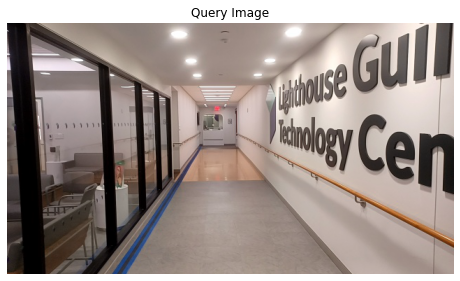

In [11]:
# Step 2: Load test image
test_image_path = "/mnt/data/UNav-IO/logs/New_York_City/LightHouse/3_floor/06465/images/2024-04-16_14-58-11.png"
img = cv2.imread(test_image_path)
if img is None:
    raise FileNotFoundError(f"Cannot load test image: {test_image_path}")

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Query Image")
plt.show()

Global feature shape: (8448,)
Local keypoints: (656, 2)
Keypoint score range: 0.0050 ~ 0.8026


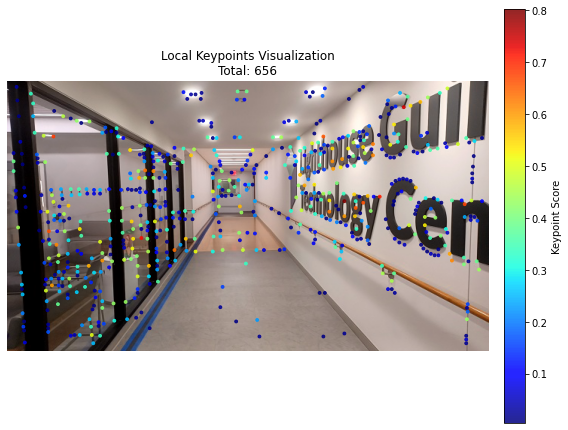

In [12]:
# Step 4-1: Extract global and local features from the query image
from visualization_tools.localization_visualization_tools import visualize_local_keypoints_on_image

global_feat, local_feat_dict = localizer.extract_query_features(img)
print("Global feature shape:", global_feat.shape)
print("Local keypoints:", local_feat_dict['keypoints'].shape)
print("Keypoint score range: {:.4f} ~ {:.4f}".format(
    local_feat_dict['scores'].min(), local_feat_dict['scores'].max()))

visualize_local_keypoints_on_image(
    img, 
    local_feat_dict['keypoints'], 
    local_feat_dict['scores'],
    figsize=(8, 8)
)

Top candidates: [('New_York_City__LightHouse__3_floor', '000231_pitch00_yaw17.png', 0.8214881420135498), ('New_York_City__LightHouse__3_floor', '000082_pitch00_yaw09.png', 0.8119266033172607), ('New_York_City__LightHouse__3_floor', '000230_pitch00_yaw16.png', 0.8041925430297852), ('New_York_City__LightHouse__3_floor', '000081_pitch00_yaw09.png', 0.7933042645454407), ('New_York_City__LightHouse__3_floor', '000083_pitch00_yaw10.png', 0.78801429271698), ('New_York_City__LightHouse__3_floor', '000083_pitch00_yaw09.png', 0.779624879360199), ('New_York_City__LightHouse__3_floor', '000080_pitch00_yaw10.png', 0.7765023112297058), ('New_York_City__LightHouse__3_floor', '000232_pitch00_yaw00.png', 0.775681734085083), ('New_York_City__LightHouse__3_floor', '000079_pitch00_yaw10.png', 0.7756626009941101), ('New_York_City__LightHouse__3_floor', '000080_pitch00_yaw09.png', 0.7751415967941284), ('New_York_City__LightHouse__3_floor', '000081_pitch00_yaw10.png', 0.7728017568588257), ('New_York_City__Li

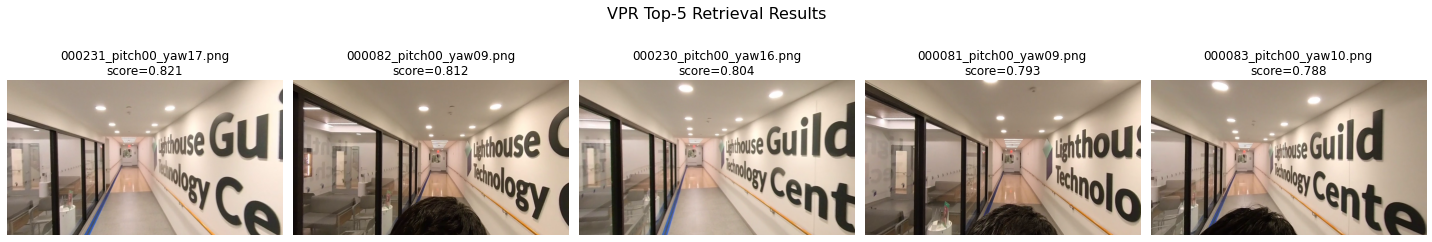

In [13]:
# Step 4-2: VPR 检索 Top-K 候选
from visualization_tools.localization_visualization_tools import plot_topk_vpr_candidates

top_candidates = localizer.vpr_retrieve(global_feat, top_k=50)
print("Top candidates:", top_candidates)

plot_topk_vpr_candidates(top_candidates, k=5, root_dir=DATA_TEMP_ROOT)

In [14]:
# Step 4-3: 加载候选参考帧 COLMAP 信息和局部特征
candidates_data = localizer.get_candidates_data(top_candidates)
print("Number of candidates with loaded data:", len(candidates_data))
for k, v in candidates_data.items():
    print(f"Candidate: {k}, map_key: {v['map_key']}, score: {v['score']}, #3D points: {np.sum([x is not None for x in v['frame']['points3D_xyz']])}")

Number of candidates with loaded data: 50
Candidate: 000231_pitch00_yaw17.png, map_key: New_York_City__LightHouse__3_floor, score: 0.8214881420135498, #3D points: 360
Candidate: 000082_pitch00_yaw09.png, map_key: New_York_City__LightHouse__3_floor, score: 0.8119266033172607, #3D points: 443
Candidate: 000230_pitch00_yaw16.png, map_key: New_York_City__LightHouse__3_floor, score: 0.8041925430297852, #3D points: 367
Candidate: 000081_pitch00_yaw09.png, map_key: New_York_City__LightHouse__3_floor, score: 0.7933042645454407, #3D points: 419
Candidate: 000083_pitch00_yaw10.png, map_key: New_York_City__LightHouse__3_floor, score: 0.78801429271698, #3D points: 352
Candidate: 000083_pitch00_yaw09.png, map_key: New_York_City__LightHouse__3_floor, score: 0.779624879360199, #3D points: 470
Candidate: 000080_pitch00_yaw10.png, map_key: New_York_City__LightHouse__3_floor, score: 0.7765023112297058, #3D points: 271
Candidate: 000232_pitch00_yaw00.png, map_key: New_York_City__LightHouse__3_floor, scor

Best map key: New_York_City__LightHouse__3_floor
Number of candidates after local matching: 45
PnP pairs 2D shape: (4871, 2) 3D shape: (4871, 3)


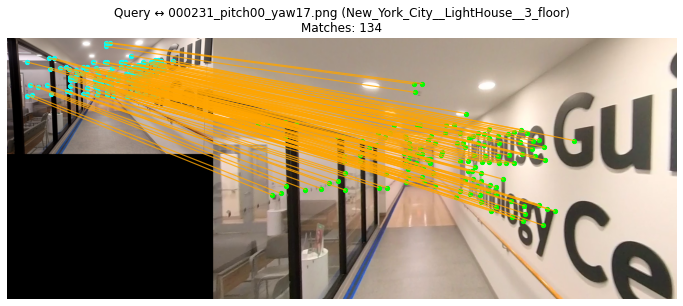

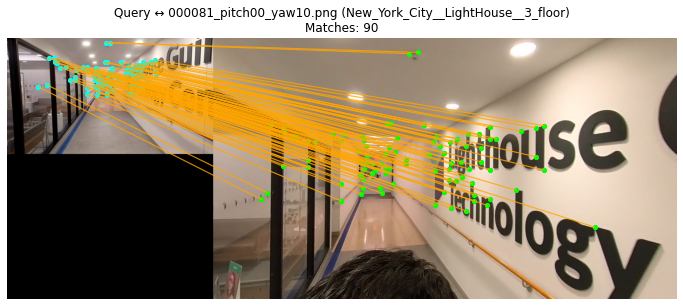

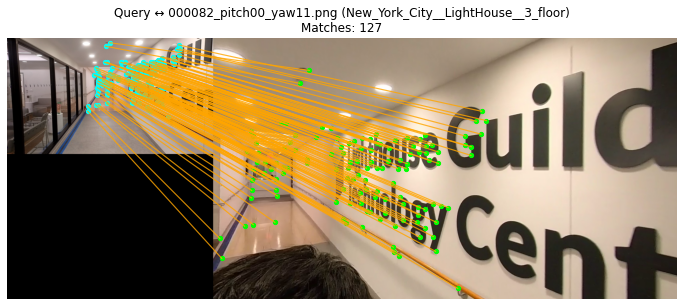

In [15]:
from visualization_tools.localization_visualization_tools import visualize_query_candidate_matches
from localizer.tools.io import load_local_features

# 新版调用
best_map_key, pnp_pairs, results = localizer.batch_local_matching_and_ransac(local_feat_dict, candidates_data)
print("Best map key:", best_map_key)
print("Number of candidates after local matching:", len(results))
print("PnP pairs 2D shape:", pnp_pairs['image_points'].shape, "3D shape:", pnp_pairs['object_points'].shape)

# Preload all candidate keypoints for the candidates in results
all_candidates_kpts = {}
for res in results:
    map_key = res['map_key']
    ref_name = res['ref_image_name']
    if map_key not in all_candidates_kpts:
        all_candidates_kpts[map_key] = {}
    if ref_name not in all_candidates_kpts[map_key]:
        h5_path = localizer.local_feat_paths[map_key]
        feats = load_local_features(h5_path, [ref_name])
        all_candidates_kpts[map_key][ref_name] = feats[ref_name]['keypoints']

visualize_query_candidate_matches(
    query_img=img,  # 当前帧RGB
    query_kpts=local_feat_dict['keypoints'],
    results=results,
    all_candidates_kpts=all_candidates_kpts,
    root_dir=DATA_TEMP_ROOT,  # 你的根目录
    num_pairs=3,
    figsize=(12,5)
)


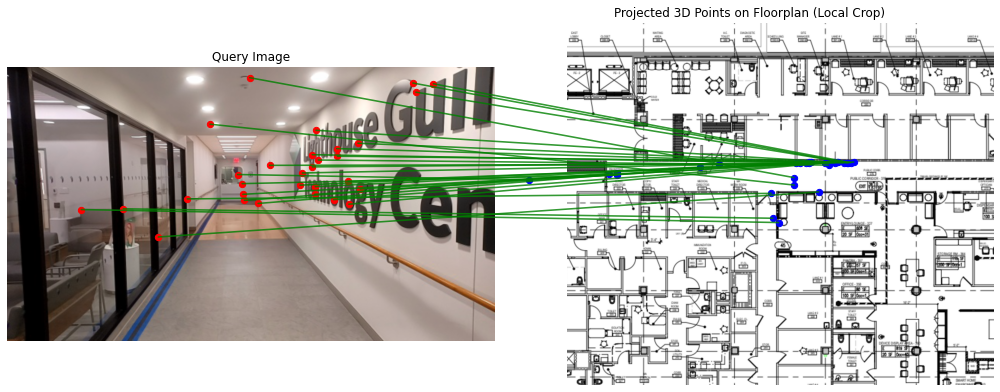

In [16]:
import os
import cv2
from visualization_tools.localization_visualization_tools import visualize_2d_3d_crosslink

# 用 batch_local_matching_and_ransac 得到的 best_map_key
floorplan_path = os.path.join(
    DATA_FINAL_ROOT, *best_map_key.split("__"), "floorplan.png"
)
floorplan_img = cv2.imread(floorplan_path)
if floorplan_img is not None and floorplan_img.ndim == 3:
    floorplan_img = cv2.cvtColor(floorplan_img, cv2.COLOR_BGR2RGB)

transform_matrix = localizer.transform_matrices[best_map_key]

visualize_2d_3d_crosslink(
    query_img=img,
    image_points=pnp_pairs['image_points'],
    object_points=pnp_pairs['object_points'],
    transform_matrix=transform_matrix,
    floorplan_img=floorplan_img,
    num_matches=30,
    crop_size=1500
)


In [17]:
# Step 4-5: 多帧 pose refine，模拟 refinement_queue
# 必须为 dict<map_key, ...>，如 {'New_York_City__LightHouse__3_floor': {"pairs": [], ...}}
refinement_queue = {best_map_key: {"pairs": [], "initial_poses": [], "pps": []}}
refine_result = localizer.multi_frame_pose_refine(
    pnp_pairs, img.shape, refinement_queue[best_map_key]
)
print("Refinement result:", refine_result)


Refinement result: {'success': True, 'qvec': array([ 0.55509074, -0.04007417, -0.82990731, -0.03901522]), 'tvec': array([ 5.30308055, -4.79691458, 49.58614063]), 'n_frames': 1, 'new_refinement_queue': {'pairs': [{'image_points': array([[384.,  54.],
       [460.,  67.],
       [468.,  68.],
       ...,
       [435., 214.],
       [444., 227.],
       [498., 246.]], dtype=float32), 'object_points': array([[-35.64994841,   0.99367207,  19.30255661],
       [-38.00787009,   1.92738522,  19.56958076],
       [-38.11934839,   2.01335286,  19.54585453],
       ...,
       [-37.13661387,   4.28426933,  19.5038491 ],
       [-37.20017194,   4.49993953,  19.41172896],
       [-39.18568743,   4.43710628,  20.21358672]])}], 'initial_poses': [[q:   0.555367 -0.0501874  -0.828783 -0.0465597, t: 5.42265 -4.9955       0 ]
], 'pps': [array([320.45287379, 176.51322917])]}}


Floorplan Pose (x, y, angle): {'xy': array([1771.25716727,  553.1054044 ]), 'ang': 182.94636794895217}


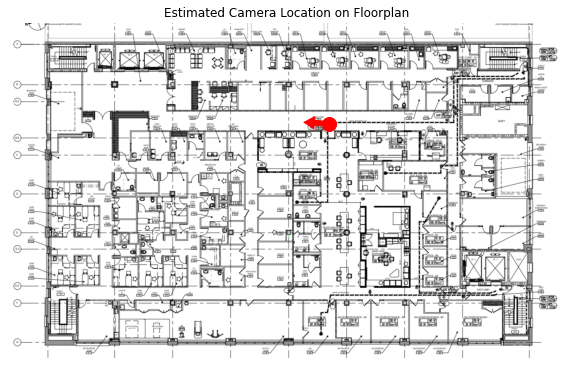

In [18]:
from visualization_tools.localization_visualization_tools import plot_camera_on_floorplan

transform_matrix = localizer.transform_matrices.get(best_map_key)
if transform_matrix is not None and refine_result["success"]:
    colmap_pose = {"qvec": refine_result.get("qvec"), "tvec": refine_result.get("tvec")}
    floorplan_pose = localizer.transform_pose_to_floorplan(
        colmap_pose["qvec"], colmap_pose["tvec"], transform_matrix
    )
    print("Floorplan Pose (x, y, angle):", floorplan_pose)
else:
    print("Floorplan transform not available.")

if floorplan_pose is not None and floorplan_pose["xy"] is not None:
    cam_xy = tuple(floorplan_pose["xy"])
    cam_angle = floorplan_pose["ang"]
    plot_camera_on_floorplan(
        floorplan_img,
        cam_xy,
        cam_angle,
        marker='ro',
        color='red'
    )
else:
    print("Floorplan transform not available or failed.")
